In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
#from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("thyroid_clean.csv")

### Brief Data Description

The dataset contains 1232 nodules from 724 patients. Each row represents one nodule and each column represents one variable that describes the characteristics of the patient or nodule. The meaning of each variable is summarized below.

    -id: the unique identity of the patient who carries the nodule
    -age: the age of the patient
    -FT3: triiodothyronine test result
    -FT4: thyroxine test result
    -TSH: thyroid-stimulating hormone test result
    -TPO: thyroid peroxidase antibody test result
    -TGAb: thyroglobulin antibodies test result
    -site: the nodule location, 0: right, 1: left, 2: isthmus
    -echo_pattern: thyroid echogenicity, 0: even, 1: uneven
    -multifocality: if multiple nodules exist in one location, 0: no, 1: yes
    -size: the nodule size in cm
    -shape: the nodule shape, 0: regular, 1: irregular
    -margin: the clarity of nodule margin, 0: clear; 1: unclear
    -calcification: the nodule calcification, 0: absent, 1: present
    -echo_strength: the nodule echogenicity, 0: none, 1: isoechoic, 2: medium-echogenic, 3: hyperechogenic, 4: hypoechogenic
    -blood_flow: the nodule blood flow, 0: normal, 1: enriched
    -composition: the nodule composition, 0: cystic, 1: mixed, 2: solid
    -multilateral: if nodules occur in more than one location, 0: no, 1: yes
###### - mal: the nodule malignancy, 0: benign, 1: malignant

In [3]:
data.head()

,age,gender,FT3,FT4,TSH,TPO,TGAb,site,echo_pattern,multifocality,size,shape,margin,calcification,echo_strength,blood_flow,composition,mal,multilateral
0,46,1,4.34,12.41,1.677,0.43,0.98,0,0,0,4.6,0,0,0,4,0,1,1,1
1,61,1,5.40,16.26,2.905,0.45,1.91,0,0,0,4.2,0,1,1,4,1,2,1,1
2,44,1,3.93,13.39,1.823,9.15,26.25,0,0,0,0.7,0,1,0,4,0,2,0,1
3,29,0,3.70,13.98,1.293,0.15,0.81,0,0,1,1.0,1,1,1,4,0,2,1,1
4,37,1,3.60,14.56,0.938,0.13,21.22,0,0,0,0.7,0,1,1,4,0,2,1,1


In [4]:
data.shape

(1232, 19)

In [5]:
data.describe()

,age,gender,FT3,FT4,TSH,TPO,TGAb,site,echo_pattern,multifocality,size,shape,margin,calcification,echo_strength,blood_flow,composition,mal,multilateral
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,46.610390,0.837662,4.471526,15.104026,2.043992,72.677119,57.855552,0.607143,0.108766,0.461039,1.731291,0.206981,0.670455,0.399351,3.672078,0.362013,1.872565,0.664773,0.767857
std,12.446767,0.368910,1.146670,3.339015,4.627580,203.397040,177.180104,0.633391,0.311472,0.498682,1.313968,0.405306,0.470239,0.489964,0.826805,0.480778,0.400033,0.472262,0.422371
min,13.000000,0.000000,2.470000,5.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,4.000000,13.670000,0.745750,0.190000,1.090000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000,1.000000
50%,47.000000,1.000000,4.350000,14.510000,1.456000,0.625000,2.690000,1.000000,0.000000,0.000000,1.300000,0.000000,1.000000,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000
75%,55.000000,1.000000,4.820000,16.230000,2.372000,5.560000,12.970000,1.000000,0.000000,1.000000,2.300000,0.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000
max,82.000000,1.000000,22.900000,59.080000,101.000000,1001.000000,1001.000000,2.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000


In [6]:
print(data.dtypes)

age                int64
gender             int64
FT3              float64
FT4              float64
TSH              float64
TPO              float64
TGAb             float64
site               int64
echo_pattern       int64
multifocality      int64
size             float64
shape              int64
margin             int64
calcification      int64
echo_strength      int64
blood_flow         int64
composition        int64
mal                int64
multilateral       int64
dtype: object


In [7]:
# Check for missing values in each column
print(data.isnull().sum())

age              0
gender           0
FT3              0
FT4              0
TSH              0
TPO              0
TGAb             0
site             0
echo_pattern     0
multifocality    0
size             0
shape            0
margin           0
calcification    0
echo_strength    0
blood_flow       0
composition      0
mal              0
multilateral     0
dtype: int64


In [8]:
#Check for duplicates in the dataset
data.duplicated().sum()

7

In [9]:
#'mal' is the name of our target variable
print(data['mal'].value_counts())

1    819
0    413
Name: mal, dtype: int64


### EXPLORATORY ANALYSIS

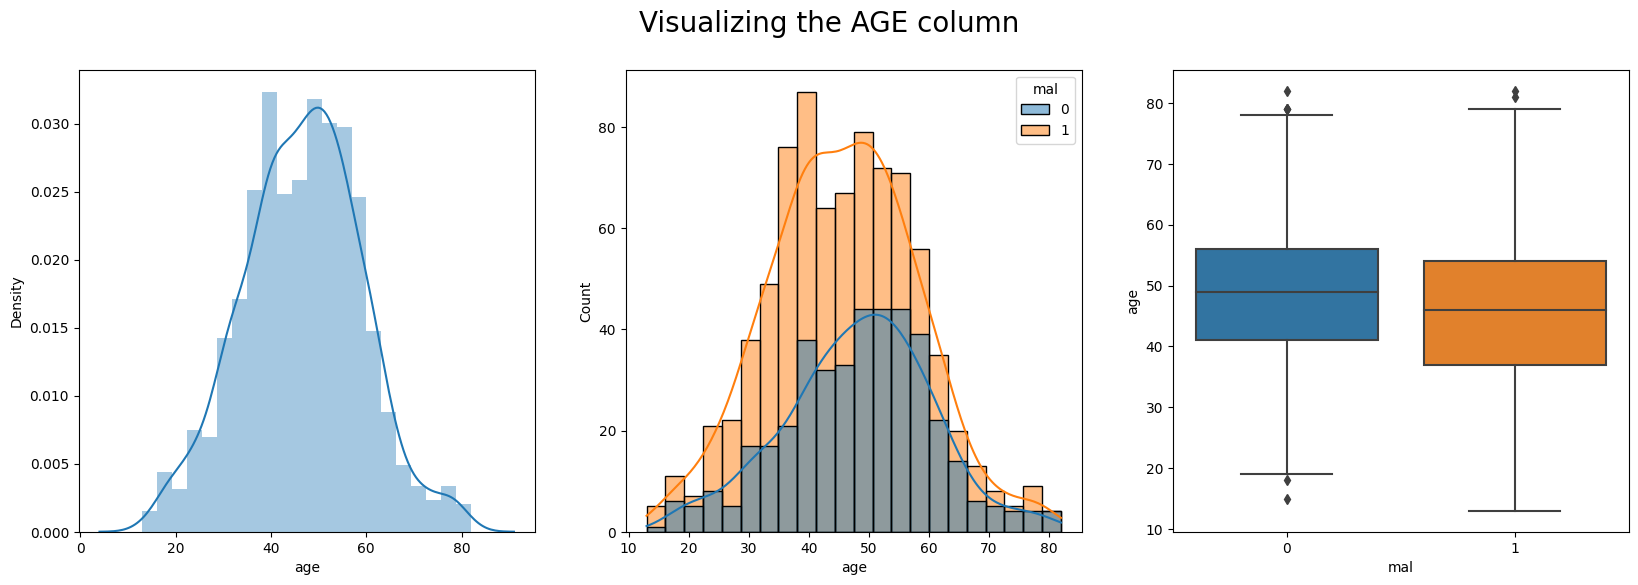

In [10]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(data['age'],ax=ax[0])
sns.histplot(data =data,x='age',ax=ax[1],hue='mal',kde=True)
sns.boxplot(x=data['mal'],y=data['age'],ax=ax[2])
plt.suptitle("Visualizing the AGE column",size=20)
plt.show()

### observation:
    - From the Histogram (in the first viz), The most common age group in this dataset is 50 years with a very high density of 0.030.
    - Second Histogram Viz adds more color and specificity to the diagram and It further distinguishes between benign and malignant cases by using different colors.

    - The box plots also provides summary statistics of the age distributions for each malignancy type. outliers can be spotted in the benign cases at age 80 and below 20 respectively. almost same for the malign cases as well.

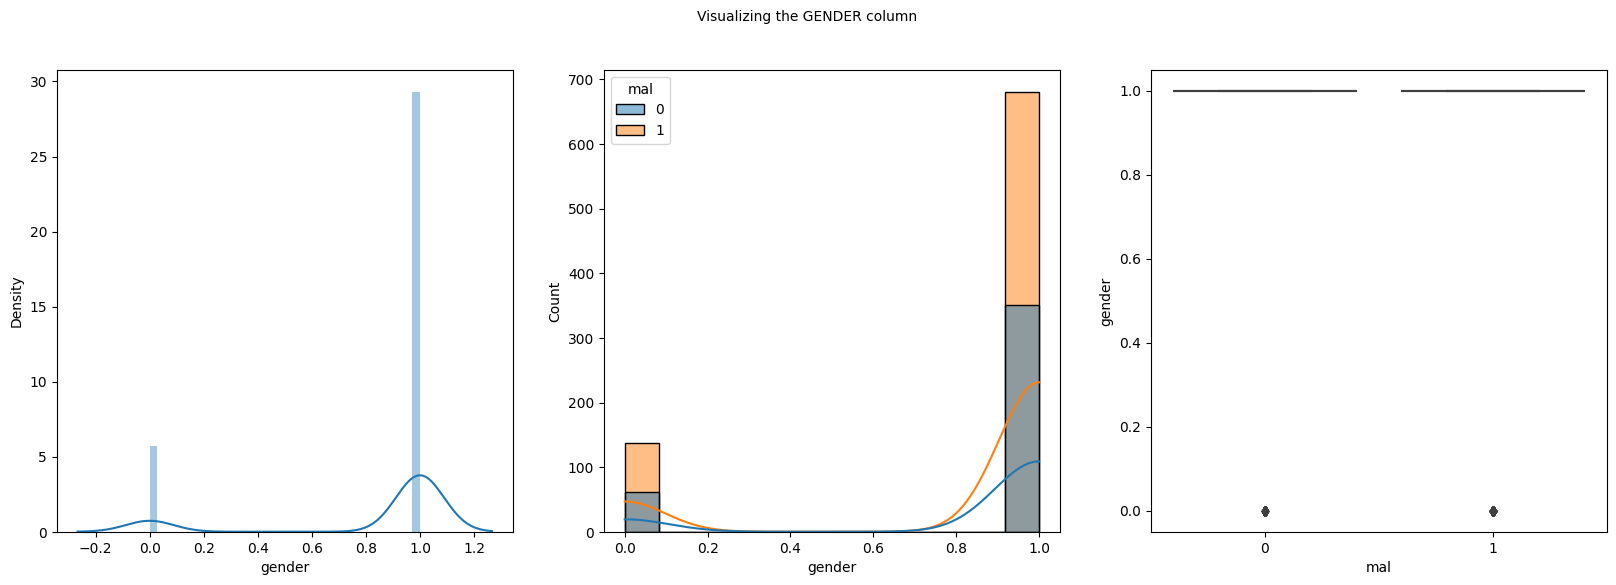

In [11]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(data['gender'],ax=ax[0])
sns.histplot(data =data,x='gender',ax=ax[1],hue='mal',kde=True)
sns.boxplot(x=data['mal'],y=data['gender'],ax=ax[2])
plt.suptitle("Visualizing the GENDER column",size=10)
plt.show()

##### Observation:
    The x-axis represents gender values, which are presumably binary (0 for male and 1 for female).
    The y-axis represents the frequency or density of each gender value.
    In this dataset, it seems that there are more female patients than male patients, as the bar representing females is higher.
    

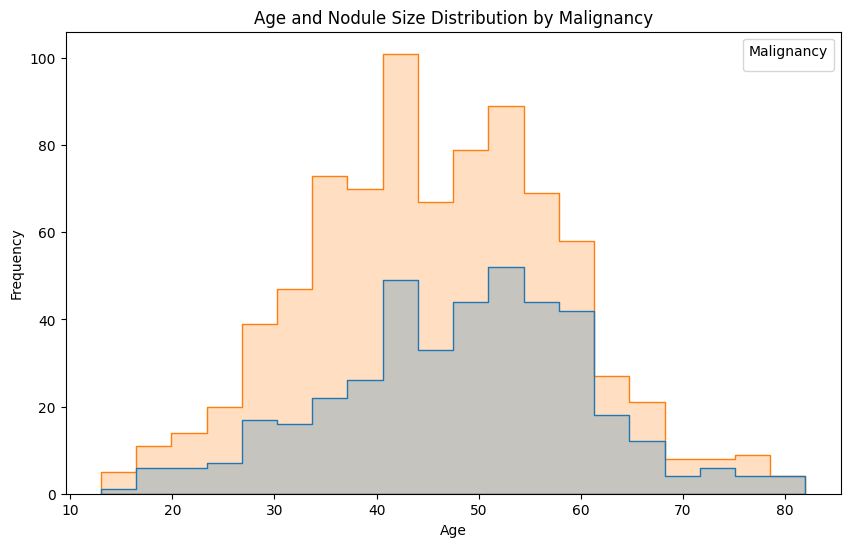

In [12]:
#Age and Nodule Size Distribution by Malignancy (Histogram):

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='mal', bins=20, element='step', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Nodule Size Distribution by Malignancy')
plt.legend(title='Malignancy')
plt.show()


### observation:
    In this histogram, we observed that the frequency of the thyroid nodule is higher in patients within the age of 40-50
    Having observed a noticeable difference in age distribution between benign and malignant cases, I suggest that nodule size  is a relevant factor in determining the age of a thyroid cancer patient.

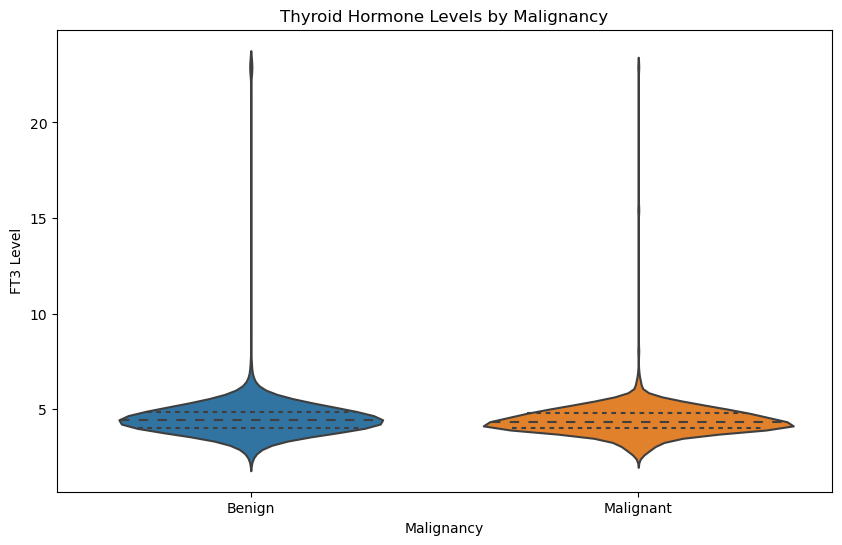

In [ ]:
#Violin Plot of Thyroid Hormone Levels by Malignancy (Seaborn):

plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='mal', y='FT3', inner='quartile')
plt.xlabel('Malignancy')
plt.ylabel('FT3 Level')
plt.title('Thyroid Hormone Levels by Malignancy')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


###  Observation
    The violin plot provides a clear visual comparison of FT3 hormone levels between benign and malignant thyroid nodules.
    significantly , majority of the patients who conducted the thyroid test had their FT3 Levels below 5 and a little above 3.
    It serves as an initial exploration of whether FT3 levels could be a potential marker for distinguishing between benign and malignant cases.significantly , majority of the patients who conducted the thyroid test had their FT3 Levels below 5 and a little above 3

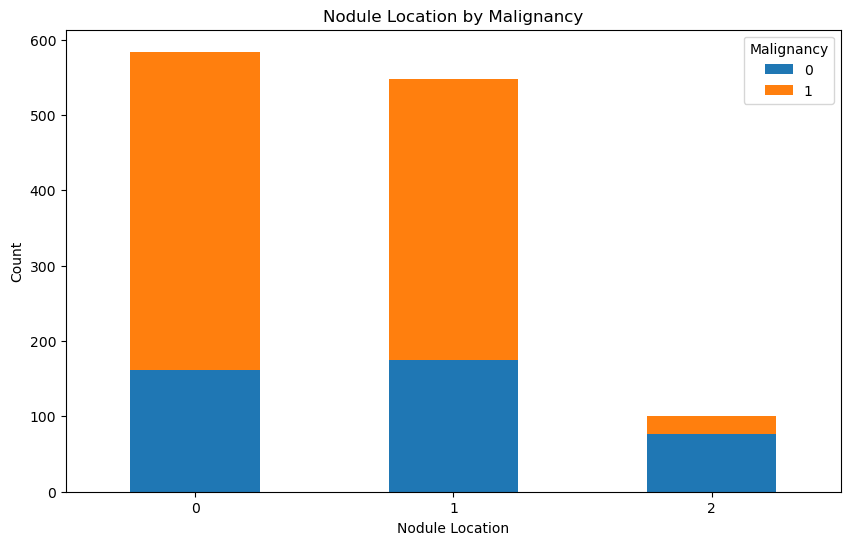

In [ ]:
#Stacked Bar Plot of Nodule Location and Malignancy
location_malignancy = data.groupby(['site', 'mal']).size().unstack()
location_malignancy.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Nodule Location')
plt.ylabel('Count')
plt.title('Nodule Location by Malignancy')
plt.xticks(rotation=0)
plt.legend(title='Malignancy')
plt.show()


### observation:

The nodule location, 0: right, 1: left, 2: isthmus

The plot helps you visualize the distribution of thyroid nodules across different locations and how this distribution is related to malignancy, assessing the relationship between nodule location and malignancy in your dataset.

Majority of patients had thyroid cancer on the right side, followed closely by the left side and less on the isthmus site.

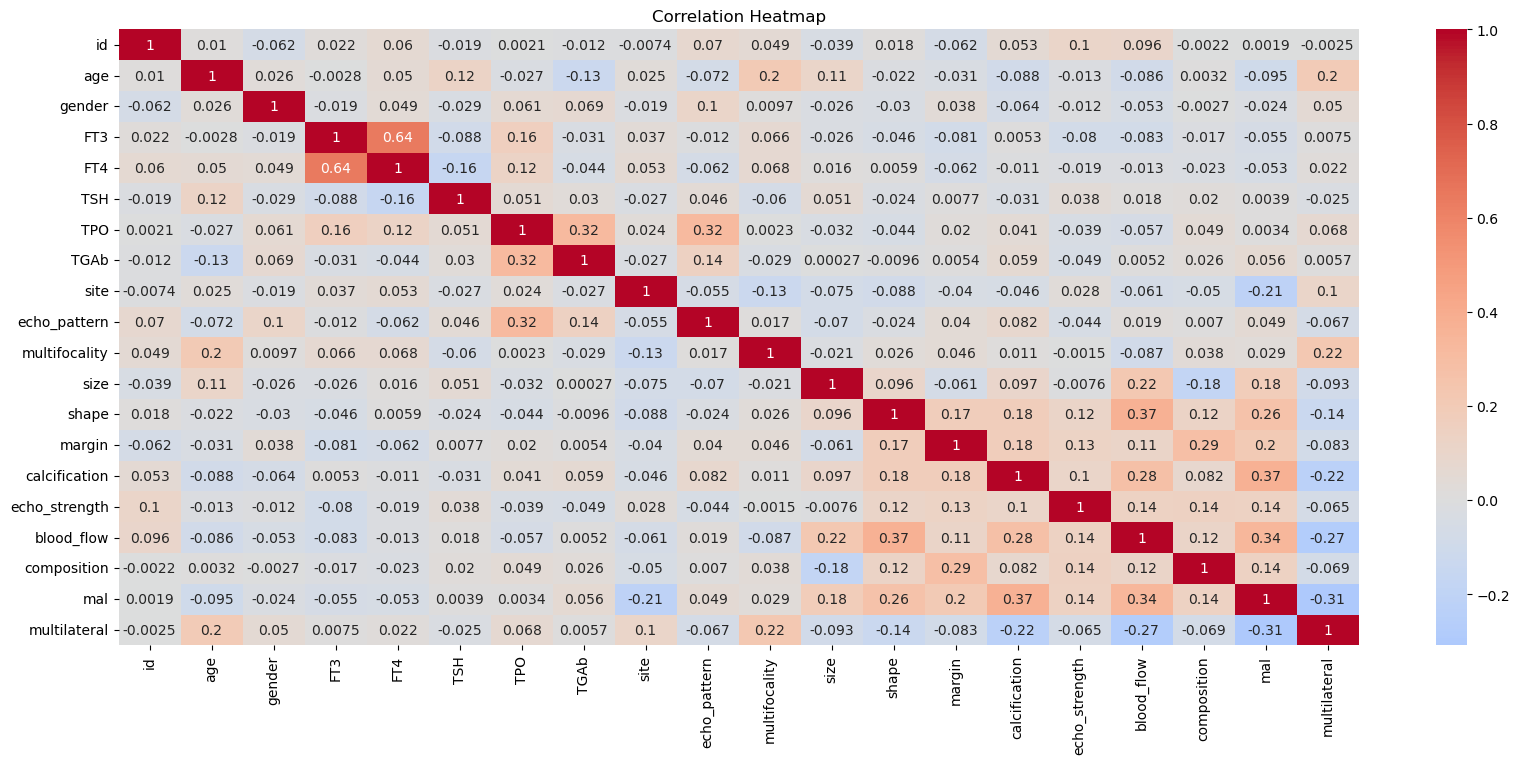

In [ ]:
#Heatmap of Correlations
correlation_matrix = data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



### Observation
    The plot is a heatmap that visualizes the correlation matrix of numerical variables in your dataset.
    The correlation heatmap provides insights into how numerical variables in your dataset are related to each other.
    We identify which variables tend to move together positively or negatively, which can help in understanding potential relationships and dependencies in your data.
    This information can guide further analysis and help in selecting relevant variables for modeling or hypothesis testing.

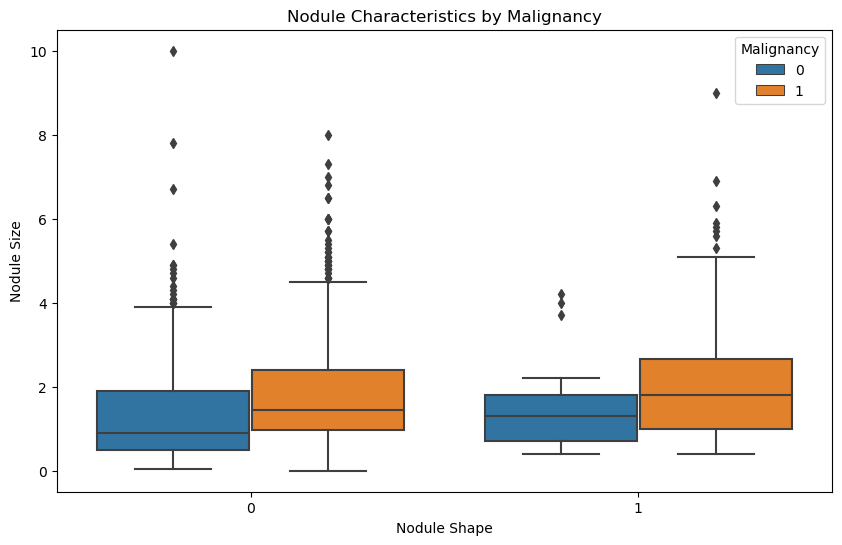

In [ ]:
#Box Plot of Nodule Characteristics by Malignancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='shape', y='size', hue='mal')
plt.xlabel('Nodule Shape')
plt.ylabel('Nodule Size')
plt.title('Nodule Characteristics by Malignancy')
plt.legend(title='Malignancy')
plt.show()


### Observation:
NODULE shape: the nodule shape, 0: regular, 1: irregular

This plot helps explore how nodule size varies based on both nodule shape and malignancy, providing valuable insights into the characteristics of thyroid nodules in this dataset.
Box plots provide insights into the central tendency, spread, and potential outliers in the data.

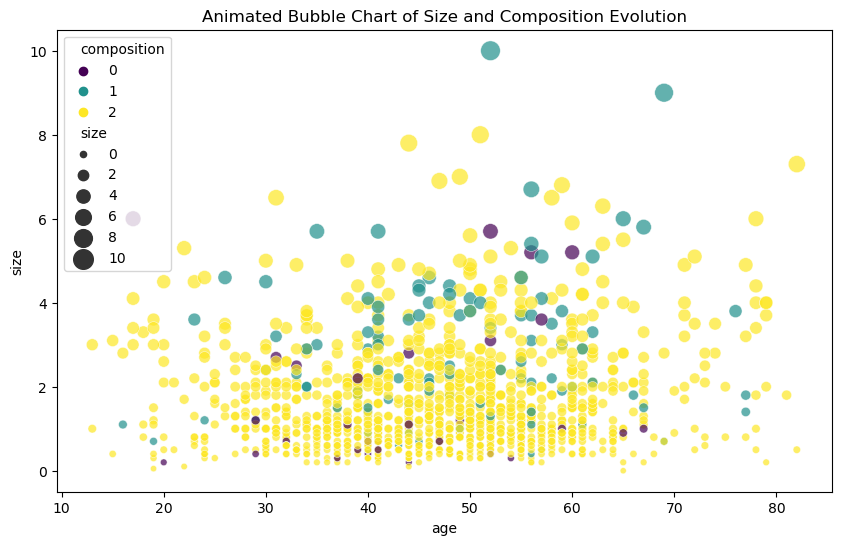

In [ ]:
#Animated Bubble Chart of Size and Composition Evolution

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='size', hue='composition', size='size', sizes=(20, 200),
                palette='viridis', alpha=0.7)
plt.title('Animated Bubble Chart of Size and Composition Evolution')
plt.show()

### Observation:
The plot provides a visual representation of the relationship between patient age, nodule size, and nodule composition.


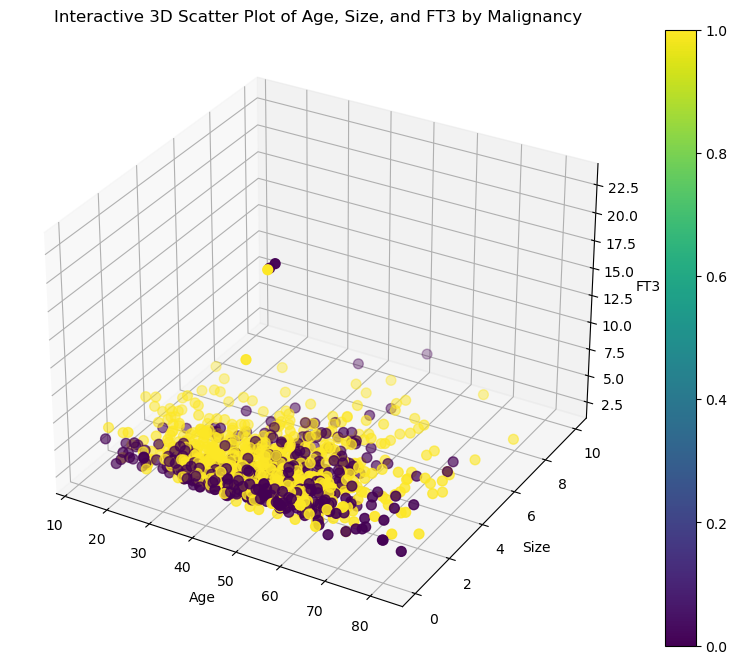

In [ ]:
#Interactive 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['age'], data['size'], data['FT3'], c=data['mal'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Size')
ax.set_zlabel('FT3')
plt.title('Interactive 3D Scatter Plot of Age, Size, and FT3 by Malignancy')
plt.colorbar(scatter)
plt.show()

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [14]:
# Select the features (numerical variables) for PCA
features = data[['age', 'FT3', 'FT4', 'TSH', 'TPO', 'TGAb', 'size']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
# Create a PCA object
pca = PCA(n_components=2)  # You can change the number of components as needed

# Fit and transform the standardized features
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame to store the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Optional: If you want to see the explained variance for each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)


Explained Variance: [0.24793682 0.19232259]


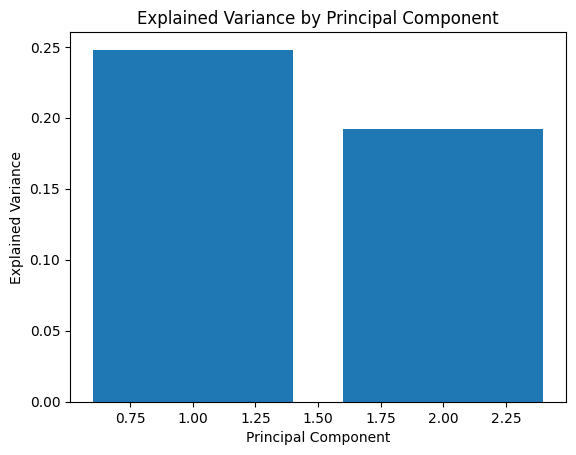

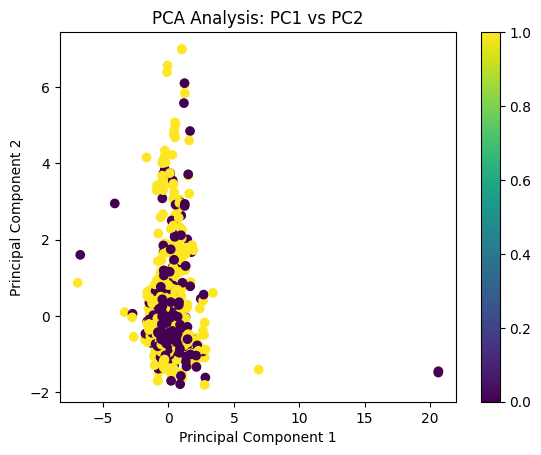

In [16]:
# Plot explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

# Visualize data in the reduced dimension
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['mal'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis: PC1 vs PC2')
plt.colorbar()
plt.show()


In [1]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster labels to the DataFrame
data['cluster'] = clusters

# Print the first few rows with the cluster labels
data.head(10)

NameError: name 'KMeans' is not defined

## Model Performance

In [18]:
# Create instances of the classifiers for easy referencing
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
meta_learner = LogisticRegression()

In [19]:
X = data.drop(columns=['mal'])  # Features
y = data['mal']  # Target variable

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Fit the classifiers on the training data
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf)], final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
#DEBUGGING attempt1
!pip3 install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#DEBUGGING attempt2
#try:
#    stacking_clf = StackingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf)], final_estimator=meta_learner)
#    stacking_clf.fit(X_train, y_train)
#except Exception as e:
#    print("An error occurred:", e)


An error occurred: 'Flags' object has no attribute 'c_contiguous'


In [ ]:
#DEBUGGING attempt3
#
#import numpy as np
#
#X_train = np.ascontiguousarray(X_train)
#y_train = np.ascontiguousarray(y_train)

In [33]:
# Make predictions on the test data
#y_pred_dt = dt.predict(X_test)
#y_pred_knn = knn.predict(X_test)
#y_pred_rf = rf.predict(X_test)
#y_pred_stacking = stacking_clf.predict(X_test)

In [23]:
#debugging attempt
X_test = np.ascontiguousarray(X_test)

In [24]:
# Make predictions on the test data
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_stacking = stacking_clf.predict(X_test)

In [25]:
# Calculate scores
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)


In [26]:
recall_dt = recall_score(y_test, y_pred_dt)
recall_knn = recall_score(y_test, y_pred_knn)
recall_rf = recall_score(y_test, y_pred_rf)
recall_stacking = recall_score(y_test, y_pred_stacking)


precision_dt = precision_score(y_test, y_pred_dt)
precision_knn = precision_score(y_test, y_pred_knn)
precision_rf = precision_score(y_test, y_pred_rf)
precision_stacking = precision_score(y_test, y_pred_stacking)

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)

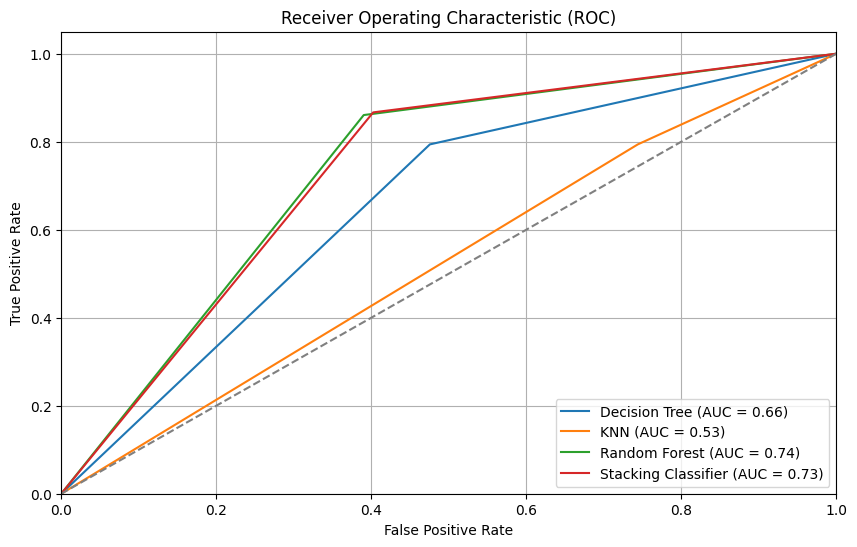

Model Performance:
Decision Tree: Accuracy = 0.70, Recall = 0.79, Precision = 0.77, ROC AUC = 0.66
KNN: Accuracy = 0.62, Recall = 0.79, Precision = 0.68, ROC AUC = 0.53
Random Forest: Accuracy = 0.78, Recall = 0.86, Precision = 0.82, ROC AUC = 0.74
Stacking Classifier: Accuracy = 0.78, Recall = 0.87, Precision = 0.81, ROC AUC = 0.73


In [27]:
# Plot ROC curves
plt.figure(figsize=(10, 6))

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_pred_stacking)
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Display scores
print("Model Performance:")
print(f"Decision Tree: Accuracy = {accuracy_dt:.2f}, Recall = {recall_dt:.2f}, Precision = {precision_dt:.2f}, ROC AUC = {roc_auc_dt:.2f}")
print(f"KNN: Accuracy = {accuracy_knn:.2f}, Recall = {recall_knn:.2f}, Precision = {precision_knn:.2f}, ROC AUC = {roc_auc_knn:.2f}")
print(f"Random Forest: Accuracy = {accuracy_rf:.2f}, Recall = {recall_rf:.2f}, Precision = {precision_rf:.2f}, ROC AUC = {roc_auc_rf:.2f}")
print(f"Stacking Classifier: Accuracy = {accuracy_stacking:.2f}, Recall = {recall_stacking:.2f}, Precision = {precision_stacking:.2f}, ROC AUC = {roc_auc_stacking:.2f}")


## Feature Importance

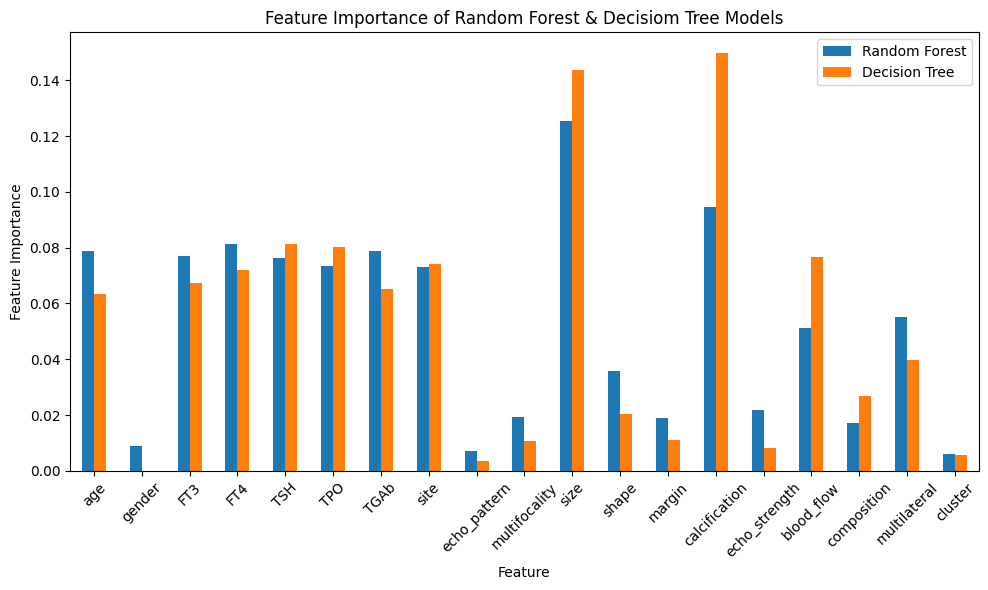

In [28]:
# Feature importance for Random Forest and Decision Tree
feature_importance_rf = rf.feature_importances_
feature_importance_dt = dt.feature_importances_

# Get column names
columns = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': columns, 'Random Forest': feature_importance_rf, 'Decision Tree': feature_importance_dt})
feature_importance_df = feature_importance_df.set_index('Feature')

# Plot feature importance
ax = feature_importance_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Feature Importance of Random Forest & Decisiom Tree Models')
ax.set_ylabel('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Feature importance for Random Forest and Decision Tree
feature_importance_rf = rf.feature_importances_
feature_importance_dt = dt.feature_importances_

In [30]:
# Get column names
columns = X_train.columns

In [31]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': columns, 'Random Forest': feature_importance_rf, 'Decision Tree': feature_importance_dt})
feature_importance_df = feature_importance_df.set_index('Feature')


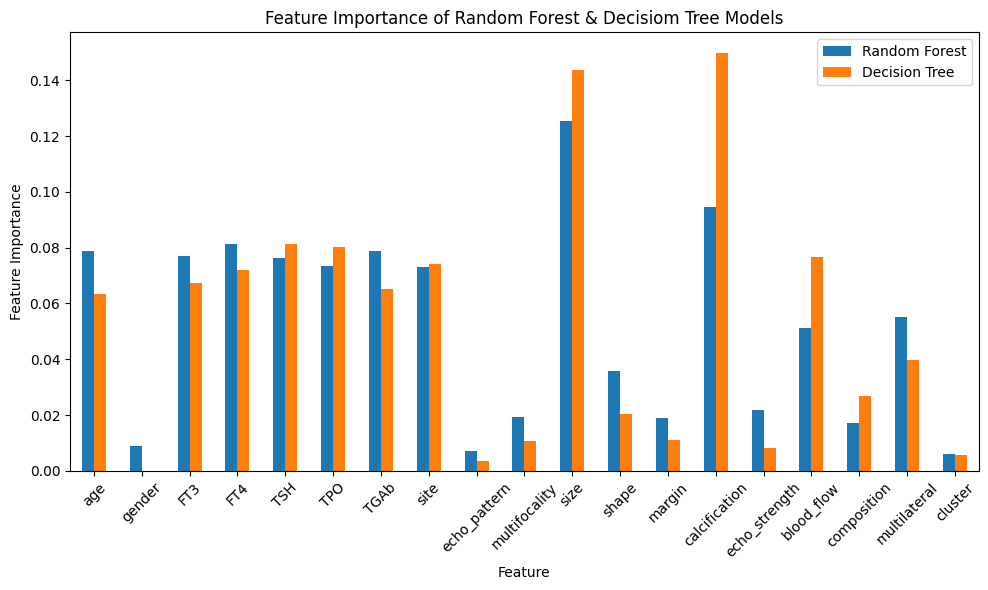

In [32]:
# Plot feature importance
ax = feature_importance_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Feature Importance of Random Forest & Decisiom Tree Models')
ax.set_ylabel('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()